## Import the libraries

In [436]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

## Read the test and training data
NR | Filename | Classes | Features | Enteries (per class)| Size (Total) |
|---|---|---|---|---|---|
|1| data_5hz-50 | 5 | (8) RMS + WL (N=100) | 50  | 250 |
|2| data_5hz-50-2 | 5 | (8) RMS + WL (N=100) | 50  | 250 |
|3| data_10hz-100 | 5 | (8) RMS + WL (N=50) | 50  | 500 |
|4| data_10hz-100-2 | 5 | (8) RMS + WL (N=50) | 50  | 500 |

In [437]:
# Select the training data
data_train = pd.read_csv("./data/new/data_5hz-50.csv")
# data_train = pd.read_csv("./data/new/data_5hz-50-2.csv")
#data_train = pd.read_csv("./data/new/data_10hz-100.csv")
#data_train = pd.read_csv("./data/new/data_10hz-100-2.csv")

# Select the testing data
#data_test = pd.read_csv("./data/new/data_5hz-50.csv")
#data_test = pd.read_csv("./data/new/data_5hz-50-2.csv")
data_test = pd.read_csv("./data/new/data_10hz-100.csv")
#data_test = pd.read_csv("./data/new/data_10hz-100-2.csv")

X = data_train.drop("res", axis=1)
y = data_train["res"] 

xx = data_test.drop("res", axis=1)
yy = data_test["res"] 



In [438]:
# Drop RMS
X = data_train.drop(["res", "f1", "f2", "f3", "f4"], axis=1)
y = data_train["res"] 

xx = data_test.drop(["res", "f1", "f2", "f3", "f4"], axis=1)
yy = data_test["res"] 


In [439]:
# Drop WL
X = data_train.drop(["res", "f5", "f6", "f7", "f8"], axis=1)
y = data_train["res"] 

xx = data_test.drop(["res", "f5", "f6", "f7", "f8"], axis=1)

yy = data_test["res"] 

In [440]:
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

#xx = scaler.transform(xx)

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11221) 


## Configure the models using the parameter found using grid search.

In [442]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=100, probability=True) 
knn = KNeighborsClassifier(n_neighbors=25)

In [443]:
clf.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=25)

In [444]:
pred_svc_y_train = clf.predict(X_test)
pred_svc_y_test = clf.predict(xx)
#sadf = clf.predict_proba([xx.iloc[100]])
#print(sadf)
pred_knn_y_train = knn.predict(X_test)
pred_knn_y_test = knn.predict(xx)


   SVC Training  SVC Testing  kNN Training  kNN Testing
0           1.0          0.9      0.952381        0.778


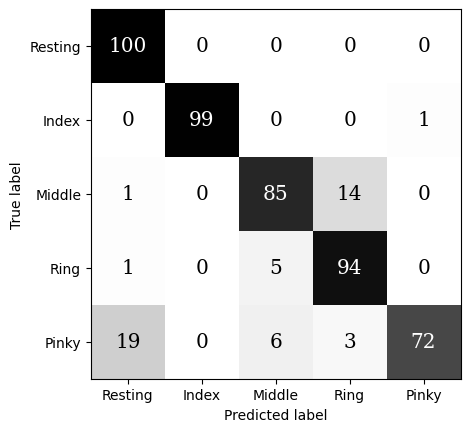

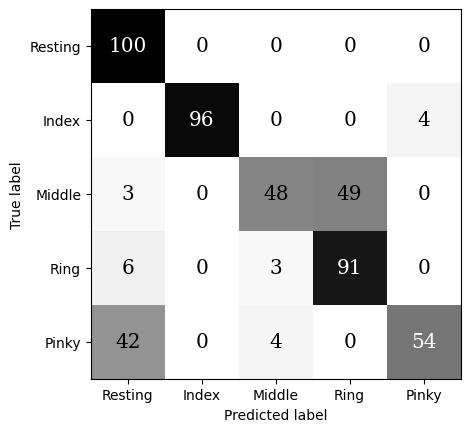

In [445]:

acc_svc_train = accuracy_score(y_test, pred_svc_y_train)
acc_svc_test = accuracy_score(yy, pred_svc_y_test)

acc_knn_train = accuracy_score(y_test, pred_knn_y_train)
acc_knn_test = accuracy_score(yy, pred_knn_y_test)
accuracies = [[acc_svc_train,acc_svc_test, acc_knn_train,acc_knn_test],]
lst = pd.DataFrame(accuracies, columns=["SVC Training", "SVC Testing", "kNN Training", "kNN Testing"])
print(lst)


labels = ["Resting", "Index", "Middle", "Ring", "Pinky"]
conf_mat = confusion_matrix(yy, pred_svc_y_test)
conf = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
conf.plot(cmap='gist_yarg', colorbar=False, text_kw={'size':'x-large', 'fontfamily': 'serif'})

conf_mat = confusion_matrix(yy, pred_knn_y_test)
conf = ConfusionMatrixDisplay(conf_mat, display_labels=labels)
conf.plot(cmap='gist_yarg', colorbar=False, text_kw={'size':'x-large', 'fontfamily': 'serif'})



plt.show()
